## JOBSHEET 8 - Supervise Learning Regression dan Classification


### LATIHAN

#### 1. Decision Tree

Decision tree (pohon keputusan) merupakan salah satu algoritma supervised learning yang dapat digunakan untuk klasifikasi dan regresi. Algoritma ini dianggap powerful atau mampu menyelesaikan masalah yang kompleks. Decision tree memprediksi sebuah kelas (klasifikasi) atau nilai (regresi) berdasarkan aturan-aturan yang dibentuk setelah mempelajari data.

Pada latihan kali ini kita akan menggunakan dataset iris yang terdiri dari 4 atribut yaitu panjang sepal, lebar sepal, panjang petal, dan lebar petal. Klasifikasi dilakukan guna memprediksi jenis bunga berdasarkan atributnya. 

Langkah pertama yang dilakukan ubah dataset jadi Pandas DataFrame.

In [1]:
import pandas as pd
 
# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')

Gunakan fungsi info() untuk melihat informasi mengenai data, dan head() untuk melihat lima data teratas pada dataset.

In [2]:
# Melihat informasi dataset
iris.info()
 
# melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Hapus kolom yang tidak diperlukan dengan fungsi drop(), kolom Id dihilangkan karena tidak mempengaruhi proses klasifikasi.

In [3]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

Berikutnya perlu memisahkan antara atribut dan label kemudian membagi data menjadi dua bagian yaitu data testing dan data training

In [4]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']
 
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)


Definisikan model decision tree yang kemudian latih model menggunakan data latih menggunakan fungsi `fit()`.

In [5]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

Pengujian model ini dilakukan dengan menggunakan fungsi `predict()`. Dan untuk mengetahui tingkat akurasi atau ketepatan algoritme decision tree gunakan fungsi `accuracy_score()`.

In [6]:
# Evaluasi Model
from sklearn.metrics import accuracy_score
 
y_pred = tree_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.933


Berikut merupakan contoh jika kita ingin memprediksi spesies dari sebuah bunga iris  yang memiliki panjang sepal 6,2 centimeter, lebar sepal 3,4 centimeter, panjang petal 5,4 centimeter, dan lebar petal 2,3 centimeter.

In [7]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


c:\Users\azkbr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Gunakan library Graphviz untuk melihat visualisasi dari decision tree yang kita buat terhadap data. 

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)



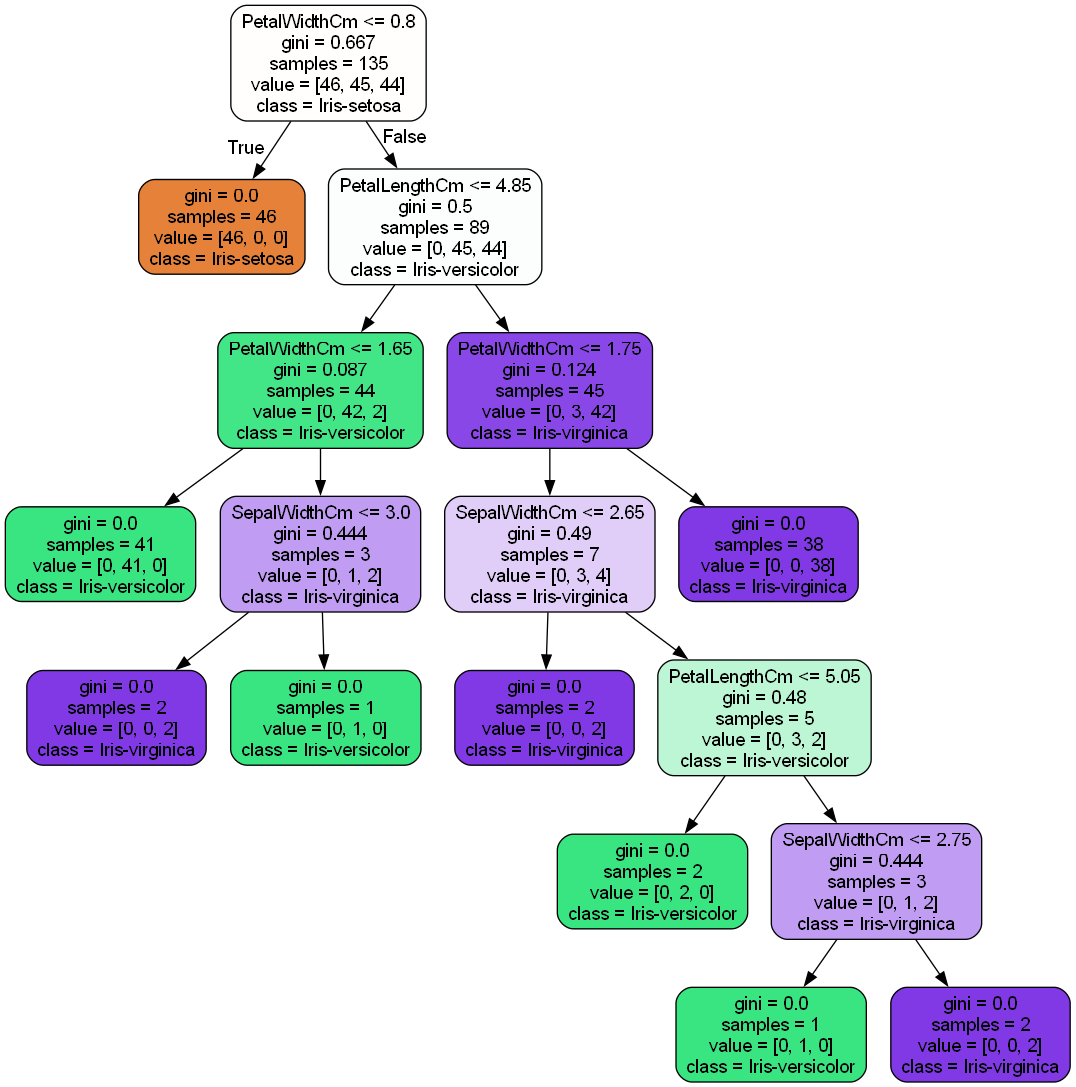

In [10]:
from graphviz import Source
from IPython.display import Image

with open("iris_tree.dot", "r") as f:
    dot_data = f.read()

graph = Source(dot_data)
graph.render("tree_image", format="png", cleanup=False)
Image("tree_image.png")


#### 2.	Linear Regression

Linear Regression digunakan untuk memprediksi bilangan kontinu, Contoh paling mudah dalam penggunaan regresi linier adalah memperkirakan harga rumah berdasarkan fitur yang terdapat pada rumah seperti luas rumah, jumlah kamar tidur, lokasi dan sebagainya.

Regresi linier cocok dipakai ketika terdapat hubungan linear pada data. Namun untuk implementasi pada kebanyakan kasus, ia kurang direkomendasikan. Sebabnya, regresi linier selalu mengasumsikan ada hubungan linier pada data, padahal tidak.  

Berikut adalah contoh implementasi regresi linear pada data dummy untuk memprediksi harga rumah dari jumlah kamar

Buat data dummy dengan numpy array

In [11]:
import numpy as np
 
#buat data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah. asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])
